## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [114]:
# Here is the library and dependencies being imported.

import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [115]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters

# This is setting the path for the read_csv function to know what and where to read into the future
# dataframes.

bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format= True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [116]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# This .head() function displays the first 5 rows of the dataframe.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [117]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters

# This is setting the path for the read_csv function to know what and where to read into the future
# dataframes.
coinbase = pd.read_csv(Path("./Resources/coinbase.csv"),
                       index_col= "Timestamp",
                       parse_dates= True,
                       infer_datetime_format= True
)


In [118]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# This .head() function displays the first 5 rows of the dataframe.

coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [119]:
# I decided to count the number of missing values throught the data set and because all columns are 
# missing 473 inputs except for the "close" column wich is not missing any, I decided to fill each missing imput with an average 
# of the values for each column, I felt like replaceing the 0 with a mean average would be the best strategy
# in this particular case.

In [120]:
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [121]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.fillna(bitstamp.mean())

/var/folders/c5/k_wjzfws6czdm_v_nmdpg4wr0000gn/T/ipykernel_77422/3165090877.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bitstamp.fillna(bitstamp.mean())


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [122]:
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [123]:
# With the .dtypes function I can see what kind of data type Pandas has given to each value.
# The "Close" column has a "$" sign that we will get rid of.

In [124]:
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [125]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

bitstamp.dtypes

/var/folders/c5/k_wjzfws6czdm_v_nmdpg4wr0000gn/T/ipykernel_77422/152619149.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [126]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [127]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

472

In [128]:
# Here we can see that there are 472 duplicated rows and I remember that there was 473 rows 
# that we filled in with the mean average values for each column, so in this case I don't think dropping
# the duplicates is Necessary.

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [129]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.isnull().sum()


Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [130]:
# I decided to count the number of missing values throught the data set and because the all columns are 
# missing 218 inputs except for the "close" column wich is not missing any, I decided to fill each missing imput with an average 
# of the value for each column, I felt like replaceing the 0 with a mean average would be the best strategy
# in this particular case.

In [131]:
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.fillna(coinbase.mean())

/var/folders/c5/k_wjzfws6czdm_v_nmdpg4wr0000gn/T/ipykernel_77422/672465332.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  coinbase = coinbase.fillna(coinbase.mean())


In [132]:
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [133]:
# With the .dtypes function I can see what kind of data type Pandas has given to each value.
# The "Close" column has a "$" sign that we will get rid of.

In [134]:
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [135]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")
coinbase.dtypes

/var/folders/c5/k_wjzfws6czdm_v_nmdpg4wr0000gn/T/ipykernel_77422/2538581153.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")


Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [136]:
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [137]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()

217

In [138]:
# Here we can see that there are 217 duplicated rows and I remember that there was 218 rows 
# that we filled in with the mean average value for each column, so in this caase I don't think dropping
# the duplicates is Necessary.

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [139]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_1 = bitstamp.iloc[:,3]

# Review the first five rows of the DataFrame
bitstamp_1.head(10)


Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
2018-01-01 00:05:00    13610.00
2018-01-01 00:06:00    13600.56
2018-01-01 00:07:00    13580.00
2018-01-01 00:08:00    13579.00
2018-01-01 00:09:00    13565.00
Name: Close, dtype: float64

In [140]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_1 = coinbase.iloc[:,3]

# Review the first five rows of the DataFrame
coinbase_1.head(10)

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
2018-01-01 00:05:00    13564.35
2018-01-01 00:06:00    13539.00
2018-01-01 00:07:00    13511.02
2018-01-01 00:08:00    13528.52
2018-01-01 00:09:00    13522.00
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [141]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_1.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [142]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_1.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'BTC Bitstamp Q1 2018'}, xlabel='Timestamp'>

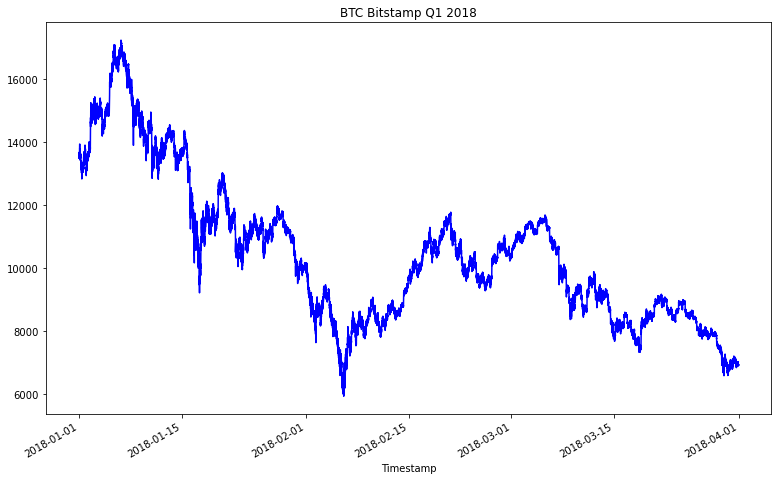

In [143]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp["Close"].plot(figsize=(13,8), title="BTC Bitstamp Q1 2018", color="blue")

<AxesSubplot:title={'center':'BTC Coinbase Q1 2018'}, xlabel='Timestamp'>

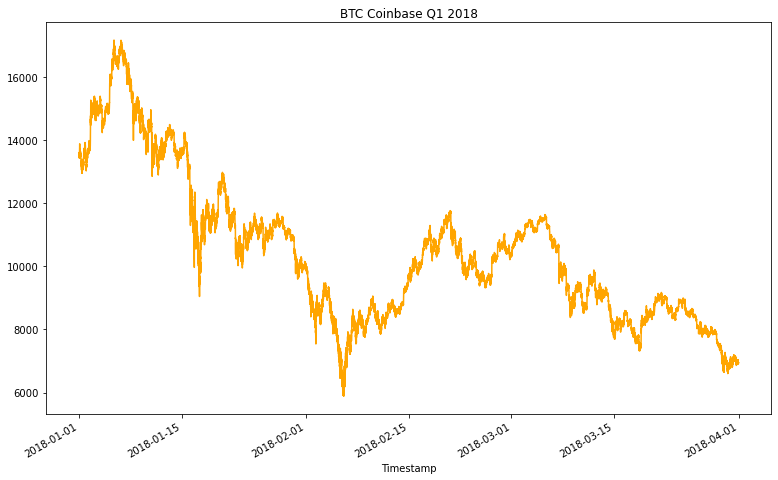

In [144]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase["Close"].plot(figsize=(13,8), title="BTC Coinbase Q1 2018", color="orange")

<AxesSubplot:title={'center':'Bitstamp V. Coinbase'}, xlabel='Timestamp'>

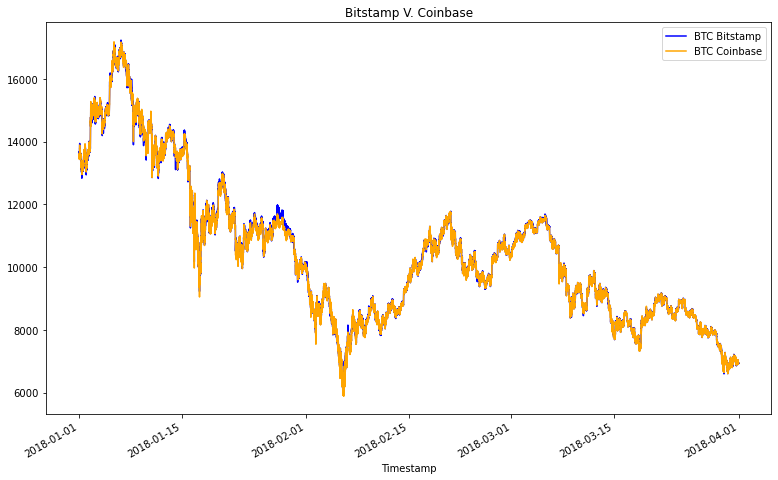

In [145]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].plot(legend=True, figsize=(13,8), title="Bitstamp V. Coinbase", color="blue", label="BTC Bitstamp")
coinbase["Close"].plot(legend=True, figsize=(13,8), color="orange", label="BTC Coinbase")
                
                

<AxesSubplot:title={'center':'Bitstamp V. Coinbase January 2018'}, xlabel='Timestamp'>

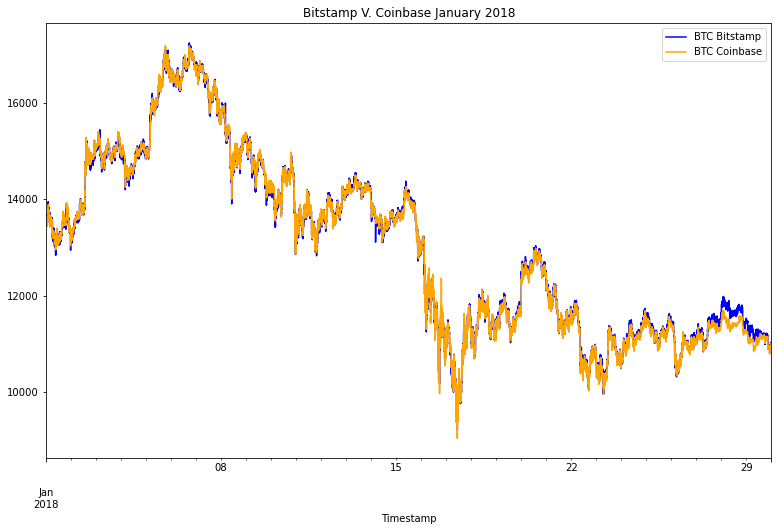

In [146]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp["Close"].loc["2018-01-01" : "2018-01-29"].plot(legend=True, figsize=(13,8), title="Bitstamp V. Coinbase January 2018", color="blue", label="BTC Bitstamp")
coinbase["Close"].loc["2018-01-01" : "2018-01-29"].plot(legend=True, figsize=(13,8), color="orange", label="BTC Coinbase")

<AxesSubplot:title={'center':'Bitstamp V. Coinbase March 2018'}, xlabel='Timestamp'>

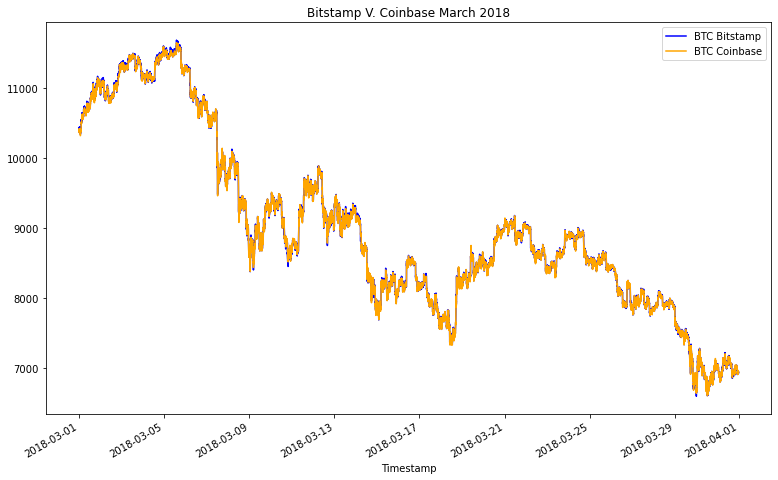

In [147]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_1.loc["2018-03-01" : "2018-03-31"].plot(legend=True, figsize=(13,8), title="Bitstamp V. Coinbase March 2018", color="blue", label="BTC Bitstamp")
coinbase_1.loc["2018-03-01" : "2018-03-31"].plot(legend=True, figsize=(13,8), color="orange", label="BTC Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

In [148]:
# Yes, It seems like the Price of BTC on Bitstamp and Coinbase is evening out
# as the year 2018 progressed, The price came down, and the price became more 
# even or there was less of a spread.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

In [149]:
# The 3 dates that I want to create summary statistics from is 2018-01-28, 2018-02-15,
# and 2018-03-28

In [150]:
# Summary statistics for BTC on Bitstamp on 2018-01-28
bitstamp["Close"].loc["2018-01-28"].describe()

count     1436.000000
mean     11675.885780
std        141.433618
min      11300.000000
25%      11609.897500
50%      11691.725000
75%      11777.530000
max      11982.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Box plot of BTC on Bitstamp 2018-01-28'}>

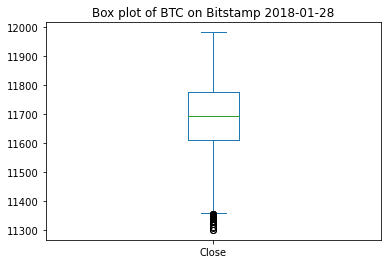

In [151]:
# Box plot for BTC on Bitstamp on 2018-01-28
bitstamp["Close"].loc["2018-01-28"].plot(kind="box", title="Box plot of BTC on Bitstamp 2018-01-28")

In [152]:
bitstamp["Close"].loc["2018-02-15"].describe()

count     1440.000000
mean      9930.236535
std        196.232293
min       9500.000000
25%       9743.000000
50%       9914.490000
75%      10107.452500
max      10298.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Box plot of BTC on Bitstamp 2018-02-15'}>

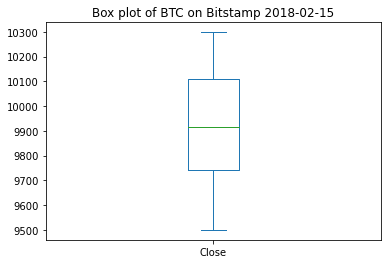

In [153]:
bitstamp["Close"].loc["2018-02-15"].plot(kind="box", title="Box plot of BTC on Bitstamp 2018-02-15")

In [154]:
bitstamp["Close"].loc["2018-03-28"].describe()

count    1438.000000
mean     7930.978338
std        64.723201
min      7809.010000
25%      7887.750000
50%      7913.465000
75%      7961.475000
max      8102.150000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Box plot of BTC on Bitstamp 2018-03-28'}>

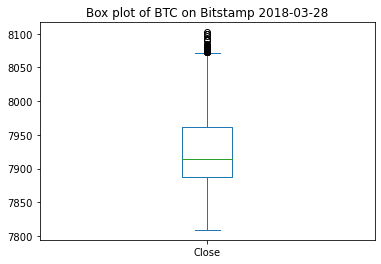

In [155]:
bitstamp["Close"].loc["2018-03-28"].plot(kind="box", title="Box plot of BTC on Bitstamp 2018-03-28")

In [156]:
coinbase["Close"].loc["2018-01-28"].describe()

count     1440.000000
mean     11428.265889
std        106.287640
min      11185.010000
25%      11356.560000
50%      11421.005000
75%      11513.927500
max      11694.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Box plot of BTC on Coinbase 2018-01-28'}>

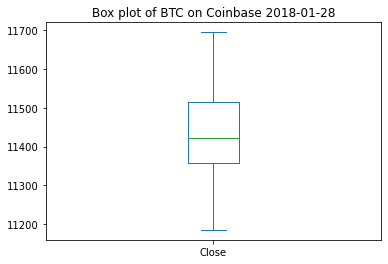

In [157]:
coinbase["Close"].loc["2018-01-28"].plot(kind="box", title="Box plot of BTC on Coinbase 2018-01-28")


In [158]:
coinbase["Close"].loc["2018-02-15"].describe()

count     1440.000000
mean      9924.476528
std        195.447618
min       9502.100000
25%       9734.010000
50%       9909.945000
75%      10098.247500
max      10307.680000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Box plot of BTC on Coinbase 2018-02-15'}>

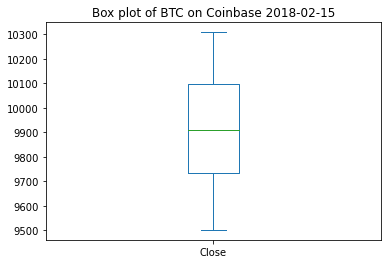

In [159]:
coinbase["Close"].loc["2018-02-15"].plot(kind="box", title="Box plot of BTC on Coinbase 2018-02-15")


In [160]:
coinbase["Close"].loc["2018-03-28"].describe()


count    1440.00000
mean     7926.45534
std        62.34019
min      7808.00000
25%      7885.45750
50%      7910.08000
75%      7956.05000
max      8088.00000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Box plot of BTC on Coinbase 2018-03-28'}>

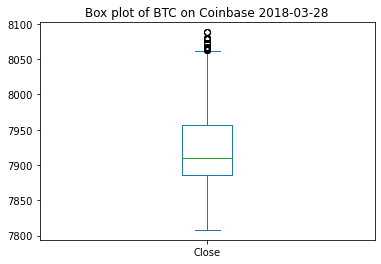

In [161]:
coinbase["Close"].loc["2018-03-28"].plot(kind="box", title="Box plot of BTC on Coinbase 2018-03-28")


<AxesSubplot:title={'center':'Arbitrage opputunity 2018-01-28'}, xlabel='Timestamp'>

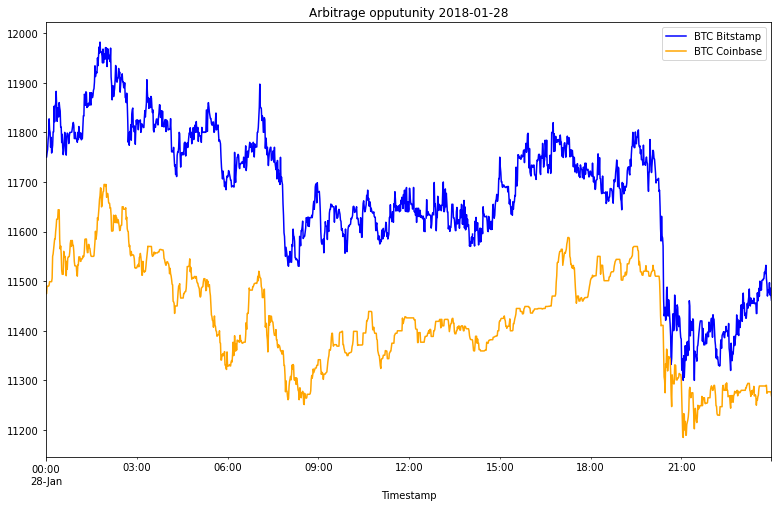

In [162]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# With this plot, you can start to really see that this day looks to be a great day to arbitrage BTC.

bitstamp["Close"].loc["2018-01-28"].plot(legend=True, figsize=(13,8), title="Arbitrage opputunity 2018-01-28", color="blue", label="BTC Bitstamp")
coinbase["Close"].loc["2018-01-28"].plot(legend=True, figsize=(13,8), color="orange", label="BTC Coinbase")

In [163]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp["Close"].loc["2018-01-28"] - coinbase["Close"].loc["2018-01-28"] 


# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage opportunity for 2018-01-28'}>

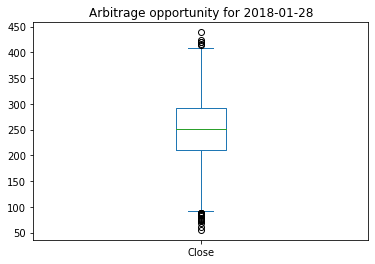

In [164]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind="box", title= "Arbitrage opportunity for 2018-01-28")

<AxesSubplot:title={'center':'Arbitrage opputunity 2018-02-15'}, xlabel='Timestamp'>

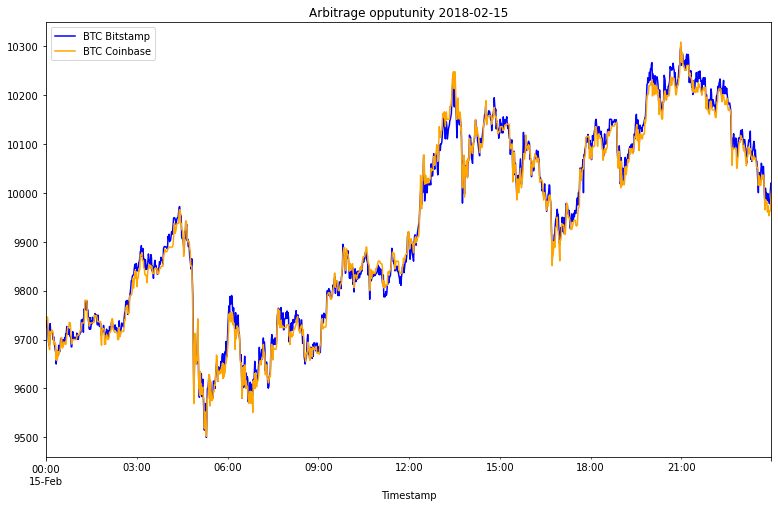

In [165]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# With this plot, you can see that it might not end up being a great day for arbitrage.

bitstamp["Close"].loc["2018-02-15"].plot(legend=True, figsize=(13,8), title="Arbitrage opputunity 2018-02-15", color="blue", label="BTC Bitstamp")
coinbase["Close"].loc["2018-02-15"].plot(legend=True, figsize=(13,8), color="orange", label="BTC Coinbase")

In [166]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp["Close"].loc["2018-02-15"] - coinbase["Close"].loc["2018-02-15"] 

# Generate summary statistics 
arbitrage_spread_middle.describe ()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Opportunity for 2018-02-15'}>

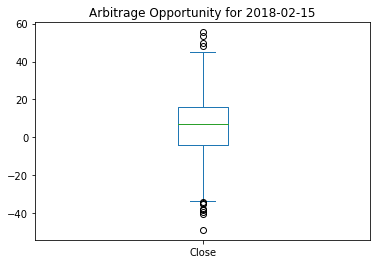

In [167]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind="box", title="Arbitrage Opportunity for 2018-02-15")

<AxesSubplot:title={'center':'Arbitrage opputunity 2018-03-28'}, xlabel='Timestamp'>

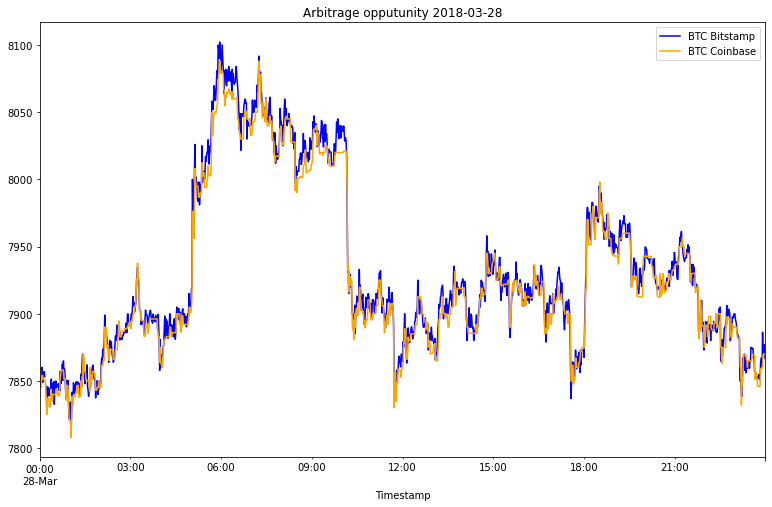

In [168]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# With this plot, you can see that it might not end up being a great day for arbitrage.

bitstamp["Close"].loc["2018-03-28"].plot(legend=True, figsize=(13,8), title="Arbitrage opputunity 2018-03-28", color="blue", label="BTC Bitstamp")
coinbase["Close"].loc["2018-03-28"].plot(legend=True, figsize=(13,8), color="orange", label="BTC Coinbase")

In [169]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp["Close"].loc["2018-03-28"] - coinbase["Close"].loc["2018-03-28"] 


# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Opportunity for 2018-03-28'}>

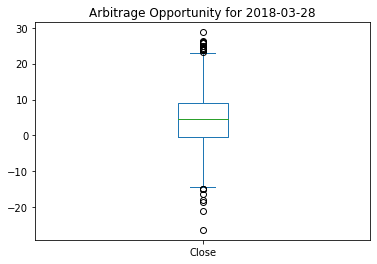

In [170]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind="box", title="Arbitrage Opportunity for 2018-03-28")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [171]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp["Close"].loc["2018-01-28"] - coinbase["Close"].loc["2018-01-28"] 

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [172]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_middle = bitstamp["Close"].loc["2018-02-15"] - coinbase["Close"].loc["2018-02-15"]
arbitrage_spread_middle.describe()

count    1440.000000
mean        5.760007
std        14.908671
min       -48.800000
25%        -3.995000
50%         6.960000
75%        16.217500
max        55.470000
Name: Close, dtype: float64

In [173]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one

arbitrage_spread_late = bitstamp["Close"].loc["2018-03-28"] - coinbase["Close"].loc["2018-03-28"]
arbitrage_spread_late.describe()

count    1438.00000
mean        4.42427
std         7.44509
min       -26.30000
25%        -0.48000
50%         4.53500
75%         8.99000
max        28.73000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [174]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early > 0] / coinbase["Close"].loc["2018-01-28"]

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Name: Close, Length: 1440, dtype: float64

In [175]:
# This calculates the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle > 0] / coinbase["Close"].loc["2018-02-15"]
spread_return_middle

Timestamp
2018-02-15 00:00:00         NaN
2018-02-15 00:01:00         NaN
2018-02-15 00:02:00         NaN
2018-02-15 00:03:00         NaN
2018-02-15 00:04:00         NaN
                         ...   
2018-02-15 23:55:00    0.001554
2018-02-15 23:56:00    0.002714
2018-02-15 23:57:00    0.004448
2018-02-15 23:58:00    0.002838
2018-02-15 23:59:00    0.000300
Name: Close, Length: 1440, dtype: float64

In [176]:
# This calculates the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).

spread_return_late= arbitrage_spread_late[arbitrage_spread_late > 0] / coinbase["Close"].loc["2018-03-28"]
spread_return_late

Timestamp
2018-03-28 00:00:00         NaN
2018-03-28 00:01:00         NaN
2018-03-28 00:02:00         NaN
2018-03-28 00:03:00    0.001122
2018-03-28 00:04:00    0.000778
                         ...   
2018-03-28 23:55:00    0.000205
2018-03-28 23:56:00    0.000203
2018-03-28 23:57:00    0.000103
2018-03-28 23:58:00    0.000883
2018-03-28 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [177]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [178]:
# this is a calculation to determine the profitable trades throughout the day, profitable being
# greater than  1% so that the trading fees can be paid before profit.

profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [179]:
# this is a calculation to determine the profitable trades throughout the day, profitable being
# greater than  1% so that the trading fees can be paid before profit.

profitable_trades_late = spread_return_late[spread_return_late > 0.01]
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [180]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [181]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase["Close"].loc["2018-01-28"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

# As you can see below, there were many profitable trades to be made on this day.

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
                        ...  
2018-01-28 23:55:00    220.10
2018-01-28 23:56:00    195.11
2018-01-28 23:57:00    208.74
2018-01-28 23:58:00    195.12
2018-01-28 23:59:00    192.63
Name: Close, Length: 1378, dtype: float64

In [182]:
# For the date middle in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase["Close"].loc["2018-02-15"]

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle

# As you can see below, there were 0 profitable trades for this day.

Series([], Name: Close, dtype: float64)

In [183]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase["Close"].loc["2018-03-28"]

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late

# As you can see below, there were 0 profitable trades for this day.

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [184]:
# Generate the summary statistics for the early profit per trade DataFrame
# Out of all the charts and dataframes, I like this one, as it shows very clearly that there were
# 1378 profitable trades for 2018-01-28, the mean average profit per trade was 250.00, the minimum 
# being 113.00 and the maximum being 439.00.
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profits per Trade'}, xlabel='Timestamp'>

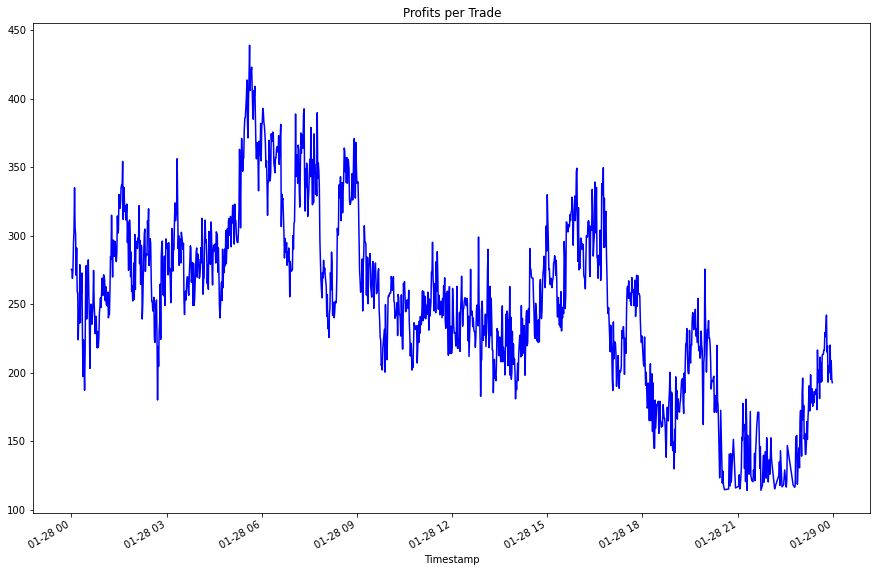

In [185]:
# Plot the results for the early profit per trade DataFrame
# This is a great chart as it shows you the profit per trade identified in the profit per trade
# early dataframe.
profit_per_trade_early.plot(figsize=(15,10), title="Profits per Trade", color="blue")

In [186]:
# Generate the summary statistics for the middle profit per trade DataFrame
# Here you can see there were 0 profitable trades for this specific day.
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profits per Trade'}, xlabel='Timestamp'>

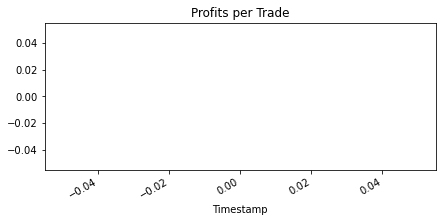

In [187]:
# Plot the results for the middle profit per trade DataFrame
# Again, here you can see there were 0 profitable trades for this day.
profit_per_trade_middle.plot(figsize=(7,3), title="Profits per Trade", color="blue")

In [188]:
# Generate the summary statistics for the late profit per trade DataFrame
# Again, here you can see there were 0 profitable trades for this day.
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profits per Trade'}, xlabel='Timestamp'>

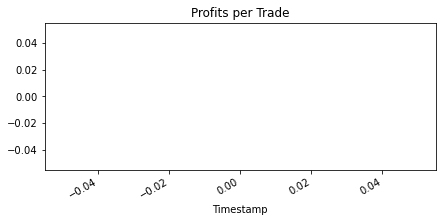

In [189]:
# Plot the results for the late profit per trade DataFrame
# Again, here you can see there were 0 profitable trades for this day.
profit_per_trade_late.plot(figsize=(7,3), title="Profits per Trade", color="blue")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [190]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# This number, the profit per trade early sum, is a bit deceiving , What it is showing is that 
# if a trader executed every profitable trade for this day, and added it all up, it would be
# just under 350,000.00 for the day. Not a bad day...

profit_per_trade_early.sum()

349918.2900000001

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [191]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative BTC Profit'}, xlabel='Timestamp'>

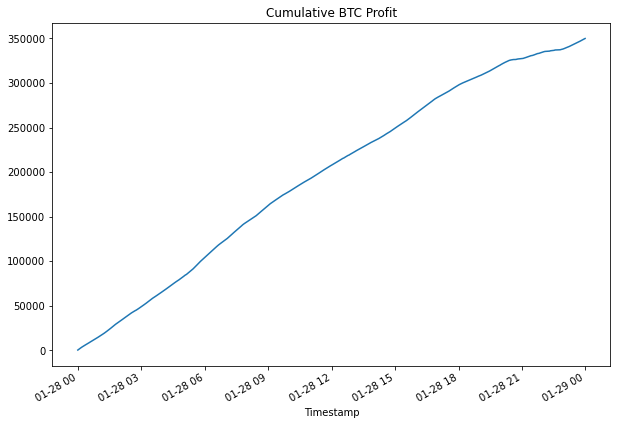

In [192]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# This chart shows the cumulative profit for the day. It gives an ok visual representation of 
# the potential money to be made, but, to realize the profits that this chart shows, the trader would
# have had to make every trade that was identified in the profit per trade dataframe. 

cumulative_profit_early.plot(figsize=(10,7), title= "Cumulative BTC Profit")

In [193]:
# Use the cumsum function to calculate the cumulative profits over time for the middle 
# profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()


In [194]:
# For both 2018-02-15 and 2018-03-28, there was zero profitable arbitrage opportunities available
# as seen in the summary statistics for those days.

<AxesSubplot:title={'center':'Cumulative BTC Profit'}, xlabel='Timestamp'>

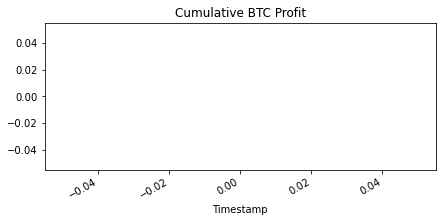

In [195]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
# There was 0 profitable trades identified for this day.
cumulative_profit_middle.plot(figsize=(7,3), title= "Cumulative BTC Profit")

In [196]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative BTC Profit'}, xlabel='Timestamp'>

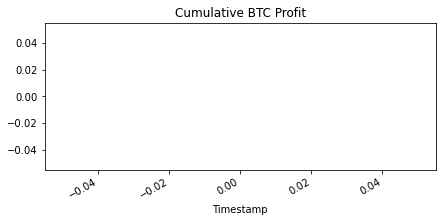

In [197]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
# There was 0 profitable trades identified for this day.
cumulative_profit_late.plot(figsize=(7,3), title= "Cumulative BTC Profit")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?

# Summary
    Based on the analysis above I have come to the following conclusions:
    
     - 2018 started with some good days for arbitraging bitcoin
     - In early 2018 there was volatility and volume wich seem to be correlated to the arbitrage oportunities.
     - As Q1 came to a close, the price of BTC had retraced by around 50% and volume and volatility had decreased as well.
     -As part of my analysis for arbitraging BTC I examined 3 days throughout Q1, early 2018-01-28, middle 2018-02-15, and 2018-03-28 towards the end of Q1.
    -Out of the 3 days that I analyzed , 2018-01-28 was the only day that offered good opportunities , so I will focus the rest of this report on that day.
    
    Its very clear that the date "2018-01-28" offered excellent opportunities for arbitraging Bitcoin.  There were around 1378 Profitable opputunities throughout that day that the dataframe identified, the mean average per trade was around 250.00 and the maximum spread was up to 430.00. This is a very good arbitrage trade day. 
    
    The days "2018-02-25" and "2018-03-28" did not offer any profitable arbitrage Opportunities, so there is not much to say about that.
    
    There is a pretty clear trend that the year 2018 started off with a higher bitcoin price as seen in the plot below and there was volatility as seen in the standard deviation numbers. As we got towards the end of Q1 2018, the closing price had retraced by 50% and the volume traded had been almost cut in half. 
    
    Please see the charts below to visualize the spread throughout Q1 and then on 2018-01-28. 
    
    

<AxesSubplot:title={'center':'Bitstamp V. Coinbase Closing Price'}, xlabel='Timestamp'>

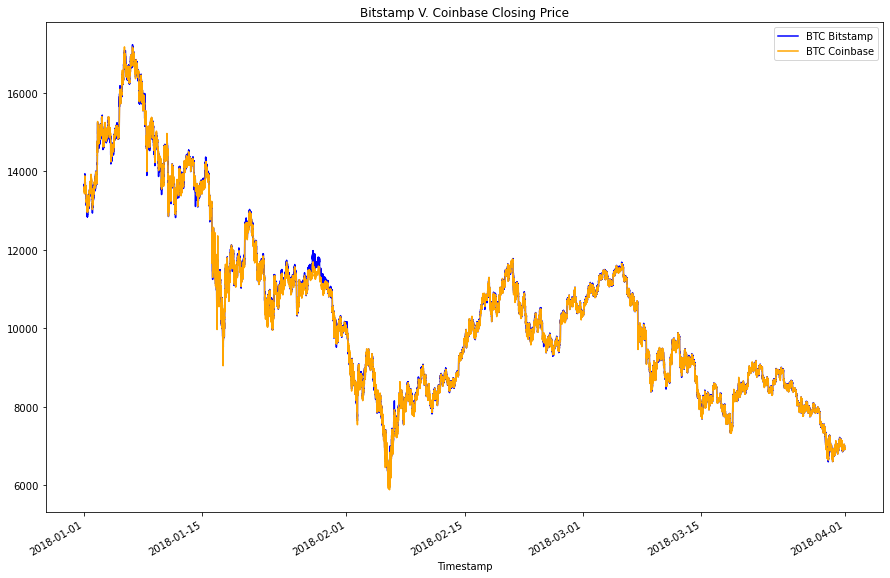

In [198]:
# This is an overlay plot of the closing price for BTC for both exchanges for the duration of Q1.
# It gives sort of a high level visual of the potential for arbitrage opportunities.
bitstamp["Close"].plot(legend=True, figsize=(15,10), title="Bitstamp V. Coinbase Closing Price", color="blue", label="BTC Bitstamp")
coinbase["Close"].plot(legend=True, figsize=(15,10), color="orange", label="BTC Coinbase")

<AxesSubplot:title={'center':'Bitstamp V. Coinbase Closing Price 2018-01-28'}, xlabel='Timestamp'>

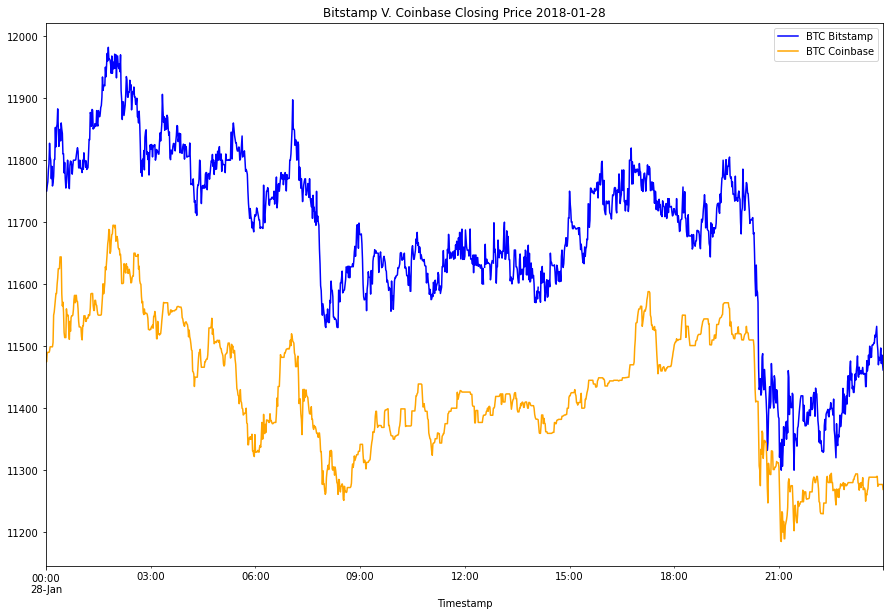

In [199]:
# Here is an overlaid plot with BTC closing price from Bitstamp and Coinbase exchange, It is a great
# visual example of arbitrage opportunity that existed on 2018-01-28.

bitstamp["Close"].loc["2018-01-28"].plot(legend=True, figsize=(15,10), title="Bitstamp V. Coinbase Closing Price 2018-01-28", color="blue", label="BTC Bitstamp")
coinbase["Close"].loc["2018-01-28"].plot(legend=True, figsize=(15,10), color="orange", label="BTC Coinbase")

In [200]:
# Here I have generated the summary statistics for the early profit per trade DataFrame, this
#n is helpful because it shows you how many trades were profitable on this day, what the mean
# average profit per trade was, the minimum profit per trade and the maximun profit per trade.
profit_per_trade_early.describe()

count    1378.000000
mean      253.931996
std        62.057953
min       113.970000
25%       217.272500
50%       254.150000
75%       292.987500
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profits per Trade'}, xlabel='Timestamp'>

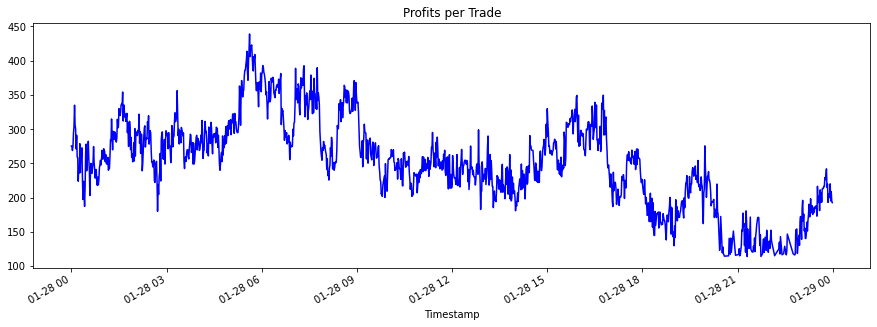

In [201]:
# Here is a plot for profit per trade early DataFrame, as y0ou can see there was great profit
# made during the early to middle part of the day.
profit_per_trade_early.plot(figsize=(15,5), title="Profits per Trade", color="blue")

<AxesSubplot:title={'center':'Cumulative BTC Profit'}, xlabel='Timestamp'>

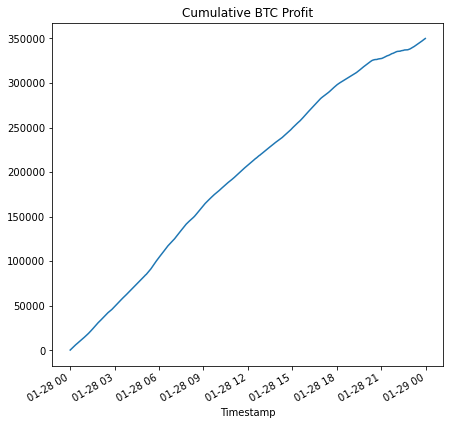

In [202]:
# Here is a plot for the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(7,7), title= "Cumulative BTC Profit")